# Manual Categories

### Manual Categories Ideas:

- Nouns only? Or also verbs?

1. Create wordlist of x number of common nouns from each city pair windowed text file.
    - option 1: get x most common nouns from each city pair, resulting in wordlist of size y.
    - option 2: get most common nouns from city pairs with atleast x counts (x can be variable to achieve wordlist with size y(1000?)
    - note: use wordfreq to remove words that already appear a lot in the English language?
    
    
2. Connect words to predefined categories
    - option 1: Add each word to a neutral or predefined category manually.
    - option 2:Add each word to a neutral or predefined category (if threshold is matched) by word2vec distance
    
    
3. Count relative frequency of a word and give a percentage match for a category to a city_pair.


Potential categories:
- war
- politics
- fashion
- culture
- football
- sports
- other
- neutral (to connect words to)

In [101]:
import os
import pickle

from collections import Counter

In [102]:
WORDLIST_LOCATION = '../../../../data/enwiki_city_pairs_nouns/'
wordlists = []
city_pairs = []

for root, dirs, files in os.walk(WORDLIST_LOCATION, topdown=True):
    for name in files:
        file_path = os.path.join(root, name)
        
        with open(file_path, 'rb') as fp:
            wordlists.append(pickle.load(fp))
            city_pairs.append(name.split('__')[1])

In [103]:
# Sort by number of words

data = list(zip(wordlists, city_pairs))
sorted_data = sorted(data, key=lambda x: len(x[0]), reverse=True)

for x in sorted_data[:20]:
    print(len(x[0]), x[1])


508714 paris_london
264452 london_manchester
187289 paris_berlin
184054 london_birmingham
182277 london_berlin
160938 paris_rome
134574 berlin_vienna
127966 paris_vienna
122109 madrid_barcelona
121589 berlin_munich
108977 london_rome
104017 berlin_hamburg
101752 london_vienna
94631 birmingham_manchester
93377 milan_rome
90575 rome_naples
80175 paris_milan
76439 paris_madrid
73062 paris_munich
64322 vienna_munich


In [104]:
len(wordlists)

190

In [106]:
# Create dict with 20 most common nouns from each city_pair wordlist

common_words = dict()
for wordlist, city_pair in sorted_data:
    frequencylist = Counter(wordlist)
    most_common = frequencylist.most_common(20)
    for x in most_common:
        if x[0] not in common_words.keys():
            common_words[x[0]] = x[1]
        else:
            common_words[x[0]] += x[1]
#     l = [(x[0], round(x[1]/len(wordlist),3)) for x in most_common]
#     print(l)
#     print(f"{city_pair}:\n {len(wordlist)}\n")

dict(sorted(common_words.items(), key=lambda item: item[1], reverse=True))

{'year': 58991,
 'art': 51019,
 'opera': 42310,
 'time': 40462,
 'city': 37641,
 'work': 34784,
 'festival': 21635,
 'music': 20666,
 'world': 20501,
 'manchester': 17427,
 'vienna': 17109,
 'school': 15036,
 'naple': 13142,
 'university': 12806,
 'exhibition': 12335,
 'club': 11656,
 'film': 11561,
 'season': 11034,
 'state': 9974,
 'company': 9734,
 'war': 9358,
 'member': 8966,
 'milan': 8760,
 'team': 8567,
 'museum': 8030,
 'study': 7500,
 'service': 7123,
 'role': 6976,
 'goal': 6725,
 'berlin': 6573,
 'match': 6221,
 'artist': 6138,
 'league': 6125,
 'munich': 6112,
 'railway': 6092,
 'line': 6027,
 'budapest': 5852,
 'painting': 5592,
 'performance': 5290,
 'gallery': 4902,
 'champion': 4839,
 'game': 4746,
 'station': 4620,
 'tour': 4447,
 'hamburg': 4127,
 'title': 3634,
 'stuttgart': 3321,
 'family': 3244,
 'lisbon': 3226,
 'liverpool': 3103,
 'house': 3079,
 'theatre': 2967,
 'group': 2933,
 'college': 2786,
 'round': 2772,
 'win': 2698,
 'player': 2625,
 'florence': 2601,


In [120]:
flat_wordlist = [word for wordlist in wordlists for word in wordlist]
flat_wordlist[:100]

['area',
 'linguistic',
 'understanding',
 'principle',
 'language',
 'theory',
 'practice',
 'education',
 'status',
 'professor',
 'sydney',
 'doctorate',
 'university',
 'fink',
 'career',
 'age',
 'band',
 'rocket',
 'band',
 'cd',
 'sound',
 'monolyth',
 'record',
 'group',
 'group',
 'fink',
 'ray',
 'drummer',
 'member',
 'remy',
 'pair',
 'record',
 'album',
 'self',
 'debut',
 'shiver',
 'archer',
 'loaf',
 'finger',
 'eye',
 'man',
 'oberst',
 'duo',
 'tour',
 'record',
 'fink',
 'co',
 'song',
 'moby',
 'escape',
 'album',
 'landing',
 'soundtrack',
 'tour',
 'ray',
 'album',
 'love',
 'drink',
 'night',
 'band',
 'year',
 'hiatus',
 'alabama',
 'heart',
 'alabama',
 'junction',
 'fort',
 'state',
 'i65',
 'limit',
 'city',
 'montgomery',
 'decatur',
 'state',
 'exception',
 'concurrency',
 'north',
 'state',
 'route',
 'today',
 'portion',
 'town',
 'city',
 'lane',
 'highway',
 'route',
 'i65',
 'junction',
 'concurrency',
 'athletic',
 'championship',
 'silver',
 'medal',

In [108]:
Counter(flat_wordlist).most_common(1000)

[('year', 59035),
 ('art', 52491),
 ('opera', 44401),
 ('time', 40564),
 ('city', 38045),
 ('work', 36745),
 ('festival', 26061),
 ('world', 25927),
 ('vienna', 23921),
 ('music', 23691),
 ('school', 20888),
 ('university', 19825),
 ('manchester', 19315),
 ('season', 18306),
 ('exhibition', 18142),
 ('film', 18107),
 ('company', 17740),
 ('club', 17645),
 ('member', 17605),
 ('naple', 17415),
 ('service', 17299),
 ('state', 16940),
 ('role', 16414),
 ('war', 16243),
 ('study', 15848),
 ('performance', 15641),
 ('group', 15530),
 ('team', 15134),
 ('museum', 15053),
 ('tour', 14671),
 ('place', 14526),
 ('artist', 14415),
 ('concert', 13579),
 ('house', 13509),
 ('gallery', 13110),
 ('family', 13025),
 ('day', 13000),
 ('theatre', 12839),
 ('title', 12588),
 ('career', 12528),
 ('line', 12518),
 ('milan', 12292),
 ('painting', 12135),
 ('director', 12059),
 ('professor', 12046),
 ('country', 11822),
 ('game', 11523),
 ('academy', 11478),
 ('production', 10715),
 ('office', 10618),
 ('ma

# Word2Vec

In [115]:
import gensim
from gensim.models import Word2Vec

# !pip install gensim

In [117]:
SIZE = 100 # dimensions of the embeddings
SG = 1 # whether to use skip-gram or CBOW (we use skip-gram)
WINDOW = 10 # the window size
N_WORKERS = 1 # number of workers to use
MIN_COUNT = 1

In [135]:
model = Word2Vec(vector_size=SIZE,
                sg=SG,
                window=WINDOW, 
                min_count=MIN_COUNT,
                workers=N_WORKERS)

model.build_vocab([flat_wordlist[:100]])

model.train([flat_wordlist[:100]],
           total_examples=model.corpus_count,
           epochs=model.epochs) # grab some coffee while training



(177, 500)

In [138]:
model.wv.most_similar('university')
#model.corpus_count

[('area', 0.21451495587825775),
 ('fink', 0.18926706910133362),
 ('town', 0.1348709911108017),
 ('status', 0.12161988019943237),
 ('understanding', 0.09628301858901978),
 ('theory', 0.08990716934204102),
 ('record', 0.08695130795240402),
 ('decatur', 0.08632656186819077),
 ('fort', 0.08614940196275711),
 ('year', 0.08534741401672363)]

# GloVe: Global Vectors for Word Representation

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
from tqdm.notebook import tqdm
# !pip install sklearn

In [174]:
GLOVE_LOCATION = '../../../../glove.42B.300d.txt'

In [183]:
embeddings_dict = {}

In [197]:
num_lines = sum(1 for line in open(GLOVE_LOCATION,'r', encoding="utf-8"))

with open(GLOVE_LOCATION, 'r', encoding="utf-8") as f:
     for line in tqdm(f, total=num_lines):
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector

  0%|          | 0/1917495 [00:00<?, ?it/s]

In [201]:
def find_closest_embeddings(embedding, cutoff=25):
    return sorted(embeddings_dict.keys(), key=lambda token: spatial.distance.euclidean(embeddings_dict[token], embedding))

In [202]:
print(find_closest_embeddings(
    embeddings_dict["twig"] - embeddings_dict["branch"] + embeddings_dict["hand"]
)[:5])

['hand', 'twig', 'hands', 'fingers', 'http://vnrockshop.com/index.html']


In [250]:
print(find_closest_embeddings(
    embeddings_dict["opera"]
)[:5])

['opera', 'operas', 'symphony', 'theatre', 'orchestra']


In [261]:
from scipy.spatial.distance import cosine

word_1 = embeddings_dict['fashion']
word_2 = embeddings_dict['war']
print(1 - cosine(word_1, word_2))

# opera and culture pretty far apart!

0.3141452968120575


In [233]:
# embeddings_dict["fashion"]

C:\Users\diede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\diede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


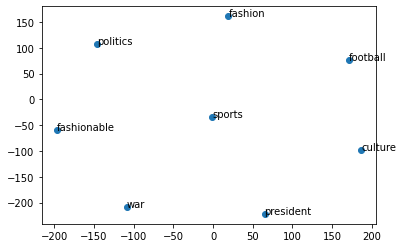

In [271]:
tsne = TSNE(n_components=2, random_state=0)

tokens = ["war", "culture", "fashion", "football", "sports", "politics", "president", "fashionable"]
vectors = [embeddings_dict[token] for token in tokens]

Y = tsne.fit_transform(vectors[:1000])

plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [268]:
tsne = TSNE(n_components=2, random_state=0)

tokens = list(embeddings_dict.keys())
vectors = [embeddings_dict[token] for token in tokens]

Y = tsne.fit_transform(vectors[:200])

C:\Users\diede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\diede\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


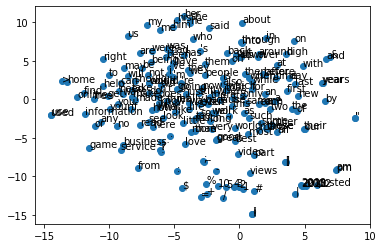

In [269]:
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(tokens, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

# Not useful for now!

In [139]:
# model = gensim.models.Word2Vec.load_word2vec_format('./model/GoogleNews-vectors-negative300.bin', binary=True)

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [170]:
s = str("C:\\Users\diede\Personal Files [Local]\Applied Data Science\Thesis - CITYNET\\glove.42B.300d.txt")
s = s.replace("\\", "/")
print(s)

C:/Users/diede/Personal Files [Local]/Applied Data Science/Thesis - CITYNET/glove.42B.300d.txt


In [165]:
s2 = str("C:\\Users\diede\Personal Files [Local]\Applied Data Science\Thesis - CITYNET\\test_word2vec.txt")
s2 = s2.replace("\\", "/")
s2

'C:/Users/diede/Personal Files [Local]/Applied Data Science/Thesis - CITYNET/test_word2vec.txt'

In [172]:
## https://radimrehurek.com/gensim/scripts/glove2word2vec.html

# glove_file = datapath(s) #"../../../../glove.42B.300d.txt")
# tmp_file = get_tmpfile(s2) #"../../../../test_word2vec.txt")

                                                                                                        
# _ = glove2word2vec(glove_file, tmp_file)
                      
# model = KeyedVectors.load_word2vec_format(tmp_file)

C:\Users\diede\AppData\Local\Temp\ipykernel_16296\4209810625.py:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  _ = glove2word2vec(glove_file, tmp_file)

KeyboardInterrupt


KeyboardInterrupt

